QUESTION 3

IMPORTING DATA

In [34]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D
import time
from matplotlib import animation
from numpy.linalg import pinv
import math

LOADING DATA AND PREPROCESSING

In [35]:
reader = csv.reader(open('logisticX.csv', 'rt'), delimiter=',')
X = list(reader)
X = np.array(X).astype(np.float64)
reader = csv.reader(open('logisticY.csv', 'rt'), delimiter=',')
Y = list(reader)
Y = np.array(Y).astype(np.float64)
Xorg=X
col=np.ones((100,1))
X=np.hstack((col,X))
theta=np.zeros((3,1))

DEFINING ALL FUNCTIONS

In [36]:
#FUNCTIONS FOR CALCULATING HTHETA
def calc_theta_trans_X(X,theta):
    return np.matmul(X,theta)

def calc_htheta(X,theta):
    theta_trans_X=calc_theta_trans_X(X,theta)
    epower=np.exp(-theta_trans_X)
    #print(epower)
    htheta=1/(1+epower)
    return htheta
def calc_logliklihood(Y,theta,X):
    log_liklihood=sum(np.multiply(Y,np.log(calc_htheta(X,theta)))
                      +np.multiply((1-Y),(np.log(1-np.log(calc_htheta(X,theta))))))
    return log_liklihood 

#FUNCTION FOR CALCULATING GRADEINT 
def calc_gradient(Y,Xorg,X,theta):
    gradient=np.zeros((2,1))
    gradient=np.matmul(np.transpose(X),(Y-calc_htheta(X,theta)))
    #print('grad')
    return gradient

#FUNCTION FOR CALCULATING HESSIAN
def calc_hessian(Y,Xorg,X,theta):
    htheta=calc_htheta(X,theta)
    mid=np.diagflat(htheta*(1-htheta))
    hessian=np.transpose(X).dot(mid).dot(X)
    return (hessian)

#FUNCTION FOR NEWTON'S ALGORITHM
def calc_Newton(theta,Y,Xorg):
    new_theta=theta
    i=1    
    while True:
        new_theta=theta+np.matmul(pinv(calc_hessian(Y,Xorg,X,theta)),calc_gradient(Y,Xorg,X,theta))
        #print(calc_gradient(Y,Xorg,X,theta))
        diff=abs(new_theta-theta)
        if(i==200 or diff.all()<10**-12):
            break
        i=i+1 
        #print(i)
        theta=new_theta 
        htheta=calc_htheta(X,theta)
        #print(theta)
    print('number of iteration are:'+str(i))     
    return theta.reshape((3,))

#CALCULATING HTHETA AND THETA
theta=calc_Newton(theta,Y,Xorg)
htheta=calc_htheta(X,theta).astype('float').reshape((100,1))
#theta=calc_Newton(theta,Y,Xorg,htheta)

number of iteration are:12


In [37]:
#predicting value 
prediction=np.ones((100,1))
for i in range(100):
    if htheta[i]<=0.5:
        prediction[i]=0 
    else:
        prediction[i]=1
final_X=np.hstack((Xorg,prediction))

In [38]:
#plotting the data
def main_method(X,final_X,theta):
    print('the final values of theta are '+str(theta))
    colors = [int(i) for i in final_X[:,2]]
    #print(colors)
    plt.scatter(final_X[:,0],final_X[:,1],c=colors)
    plt.plot(X[:,1],-(theta[0]/theta[2]+theta[1]/theta[2]*X[:,1]), 'r',label='decision boundary')
    plt.xlabel('feature1')
    plt.legend()
    plt.ylabel('feature2')
    plt.title('logistic regression')
    plt.savefig('q3.png')
    plt.show()
    

the final values of theta are [ 0.22329537  1.96261552 -1.9648612 ]


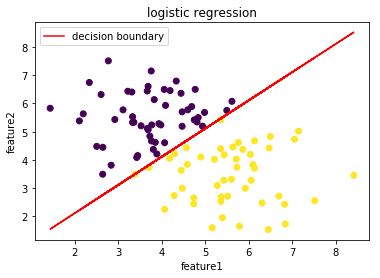

In [39]:
main_method(X,final_X,theta)